# Regularized Logistic Regreesion（逻辑回归的正则化）

* 选用kernel learning_dl
~~~
conda activate learning_dl 

# conda remove --name learning_dl --all
~~~

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("finish import module!!!")

finish import module!!!


In [19]:
data2 = pd.read_csv('ex2data2.txt', header=None, names=['Test 1', 'Test 2', 'Accepted'])
print(data2)

       Test 1    Test 2  Accepted
0    0.051267  0.699560         1
1   -0.092742  0.684940         1
2   -0.213710  0.692250         1
3   -0.375000  0.502190         1
4   -0.513250  0.465640         1
..        ...       ...       ...
113 -0.720620  0.538740         0
114 -0.593890  0.494880         0
115 -0.484450  0.999270         0
116 -0.006336  0.999270         0
117  0.632650 -0.030612         0

[118 rows x 3 columns]


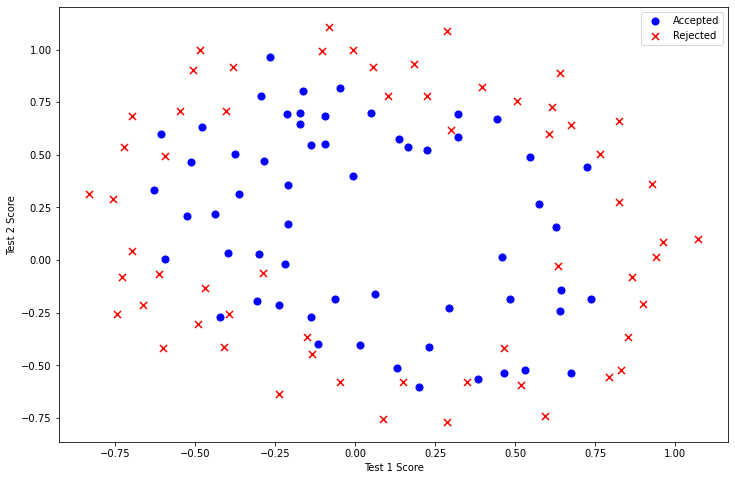

In [20]:
#将样本数据画出来
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

从上图可以看到比起[test1](./code.ipynb)数据分布更加复杂,其中是没有线性决策边界的.

下面尝试创建一组多项式特征入手:

In [21]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)#在第三列插入一列1

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j) #构造特征(通过x1和x2的不同次幂组合)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

# print(data2)
data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


# 定义regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costReg(theta, X, y, RegulationRate):
    # 转换为矩阵
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    # 第一项
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))

    # 第二项
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))

    # 正则化项
    reg = (RegulationRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg

In [23]:
# 下面定义正则化的梯度下降
def gradientReg(theta, X, y, RegulationRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((RegulationRate / len(X)) * theta[:,i])
    
    return grad

In [24]:
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

RegulationRate=1;

import scipy.optimize as opt
result = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, RegulationRate))
print("result:",result)
print("final cost:", costReg(result[0], X2, y2,RegulationRate))


result: (array([ 0.53010248,  0.29075567, -1.60725764, -0.58213819,  0.01781027,
       -0.21329508, -0.40024142, -1.37144139,  0.02264304, -0.9503358 ,
        0.0344085 ]), 22, 1)
final cost: 0.6226824388287231


In [25]:
#进行分类预测
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability] #返回预测的类别,当大于0.5时，预测为1，否则为0

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 78%


In [26]:
#下面直接调用scikit-learn来解决这个问题
from sklearn import linear_model#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, y2.ravel())
model.score(X2, y2)

0.6610169491525424